## **Insert our Dataset and Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv("US_Regular_All_Formulations_Gas_Price.csv")

In [ ]:
df.head

<bound method NDFrame.head of            DATE  GASREGW
0    2021-11-22    3.395
1    2021-11-29    3.380
2    2021-12-06    3.341
3    2021-12-13    3.315
4    2021-12-20    3.295
..          ...      ...
100  2023-10-23    3.533
101  2023-10-30    3.473
102  2023-11-06    3.396
103  2023-11-13    3.349
104  2023-11-20    3.289

[105 rows x 2 columns]>

In [ ]:
df.columns

Index(['DATE', 'GASREGW'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     105 non-null    object 
 1   GASREGW  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
df.dropna()

,DATE,GASREGW
0,2021-11-22,3.395
1,2021-11-29,3.380
2,2021-12-06,3.341
3,2021-12-13,3.315
4,2021-12-20,3.295
...,...,...
100,2023-10-23,3.533
101,2023-10-30,3.473
102,2023-11-06,3.396
103,2023-11-13,3.349


<Axes: >

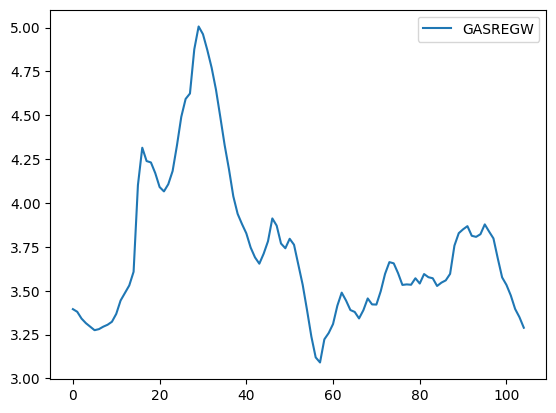

In [ ]:
df.plot()

## **Implement ETS**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
# Set the column as the index
df.set_index('DATE', inplace=True)

In [ ]:
# Decompose
result = seasonal_decompose(df['GASREGW'], model='additive')

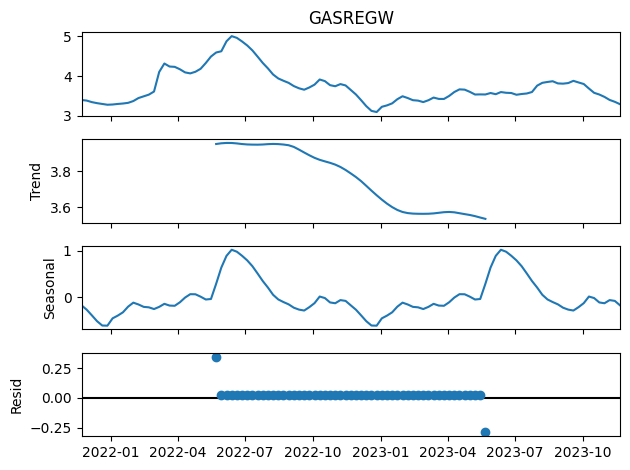

In [ ]:
result.plot();

## **Create EWMA for your preffered window**

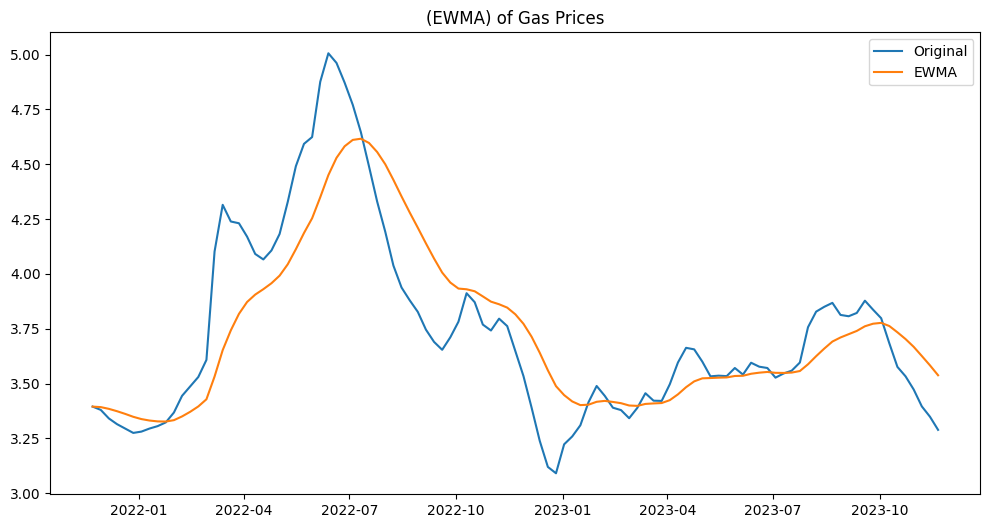

In [ ]:
# Calculate (EWMA)
ewma_span = 12
ewma = df['GASREGW'].ewm(span=ewma_span, adjust=False).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['GASREGW'], label='Original')
plt.plot(ewma, label='EWMA')
plt.title('(EWMA) of Gas Prices')
plt.legend()
plt.show()

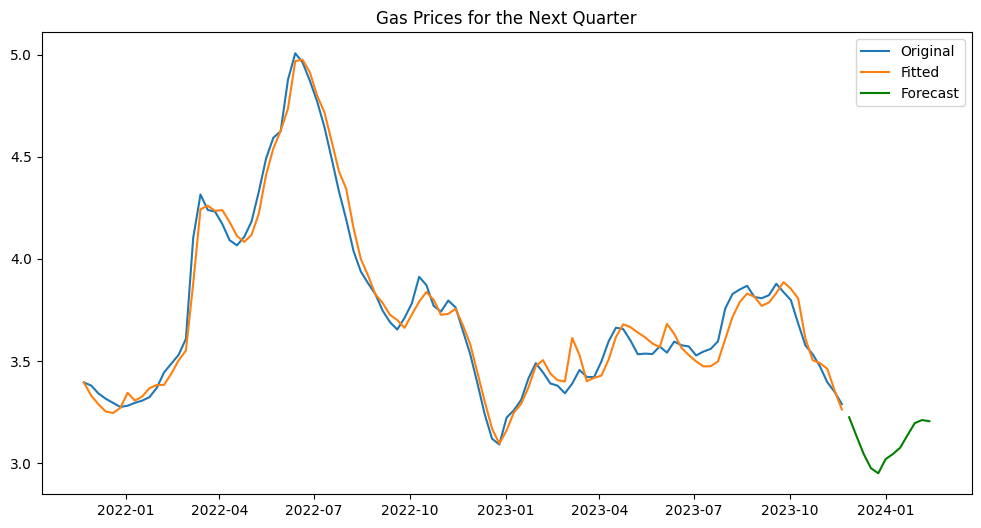

2023-11-27    3.224588
2023-12-04    3.133061
2023-12-11    3.044550
2023-12-18    2.974901
2023-12-25    2.950387
2024-01-01    3.019456
2024-01-08    3.044545
2024-01-15    3.075529
2024-01-22    3.136466
2024-01-29    3.195765
2024-02-05    3.210899
2024-02-12    3.205289
Freq: W-MON, dtype: float64

In [ ]:
forecast_periods = 12

# Fit the Holt-Winters model
df_model = ExponentialSmoothing(
    df['GASREGW'],
    trend='add',
    seasonal='add',
    seasonal_periods=52
).fit()

# Forecast for the next quarter
forecast = df_model.forecast(forecast_periods)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['GASREGW'], label='Original')
plt.plot(df_model.fittedvalues, label='Fitted')
plt.plot(forecast, label='Forecast', color='green')
plt.title('Gas Prices for the Next Quarter')
plt.legend()
plt.show()

forecast
